## 결정트리(Decision Trees)

- 결정트리는 분류와 회귀 문제에 널리 사용하는 모델
- 

설치 방법
conda install graphviz
pip install graphviz

설정 - 시스템 - 정보 - 고급시스템 설정 - 환경변수 - path찾아서 들어가 - 새로만들기 한후
- graphviz경로(C:\Users\seulki\anaconda3\envs\jupyter_env\Library\bin\graphviz) 복사 후 붙여넣기
- 재실행

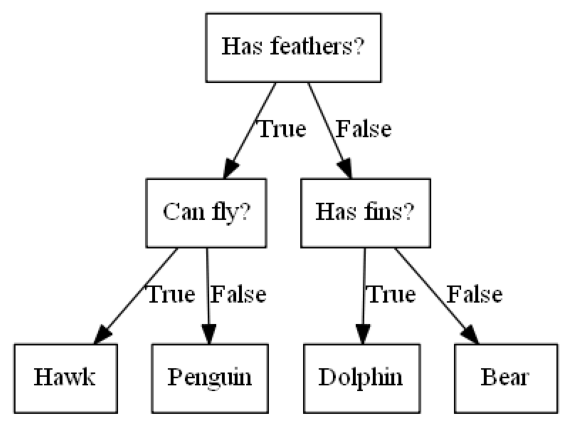

In [2]:
import mglearn
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
mglearn.plots.plot_animal_tree()
plt.show()

- 머신러닝 입장에서 말하자면, 세 새의 feature("has feathers","Can fly","Has fins")를 사용해 네 개("hawks","penguin","dolphin","bea")의 클래스를 구분하는 모델을 만든 것임

- 이런 모델을 직접 만드는 대신 지도학습 방식으로 데이터로부터 학습을 시킬 수 있음

## 결정 트리 만들기

- 마지막 노드를 leaf node라고 함
- 타식 하나로 이루어진 leaf node를 순수 노드(pure node)라고 함

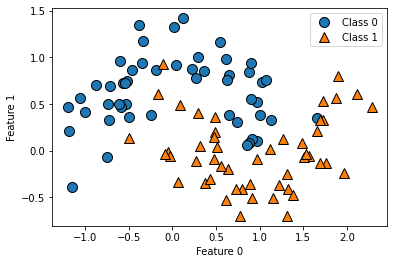

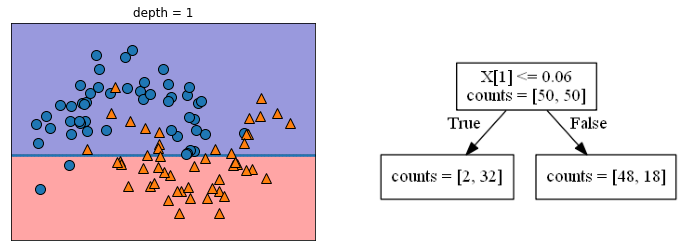

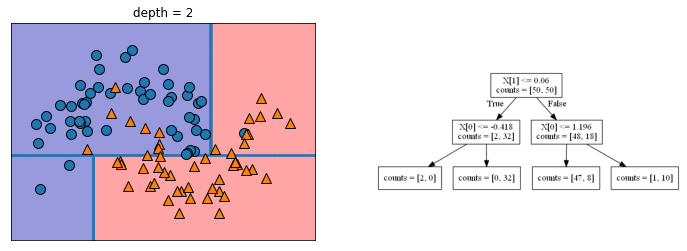

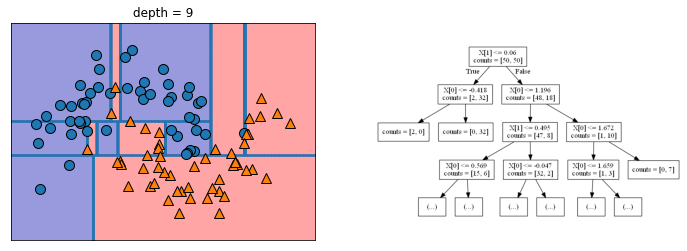

In [4]:
mglearn.plots.plot_tree_progressive()
plt.show()

feature1 == X[1] 가 0.06보다 작으면 아래쪽 크면 위쪽

In [5]:
## 결정 트리 복잡도 제어하기
- 일반적으로 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합됨
- 순수 노드로 이루어진 결정트리는 훈련 세트에 100% 정확하게 맞는다는 의미(훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있음)
- 클래스 0으로 결정된 영역이 크래스 1에 속한 포인트 들로 둘러쌓여 있음(또는 그 반대의 경우)
- 이는 바람직하 ㄴ결정 경계의 모습이 아님. 결정 경계가 클래스의 포인트들에서 멀리 떨어진 이상자(outer) 하나에 너무 민감하기 때문

SyntaxError: invalid syntax (Temp/ipykernel_19076/2575069585.py, line 2)

- 과대적합을 막는 전략은 크게 두가지
- 트리 생성을 일찍 중단하는 전략(사전 가지치기: pre pruning)과
- 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략(사후 가지치기 또는 그냥 가지치기
- 사전 가지치기 방법은 트리의 최대 깊이나 리프의 최대 개수를 제한하하거나, 또는 노드가 분할하기 위한 포인트의 최소 수를 지정하는 것
- scikit-learn 에서 결정 트리는 DicisionTreeRegressor와 에 구현되어 있음
- 사이킷런은 사전 가지치기만 지원
                                         

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set:0.937


- 훈련 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 깊게 만들어졌음
- 테스트 세트의 정확도는 이전에 본 선형 모델에서의 정확도인 95%보다 조금 낮음
- 결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해 질 수 있으므로 과대적합되기 싶고 새로운 데이터에 잘 일반화되지 않음
- 이제 사전 가지치기를 트리에 적용하여 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막아보겠음
- max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한하게 됨
- 트리깊이를 제한하면 과대 적합이 줄어듬
- 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 좋아짐

In [9]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set:0.951


In [11]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot',class_names=['malignant','benign'],
                feature_names=cancer.feature_names, impurity=False, filled=True)
#impurity -

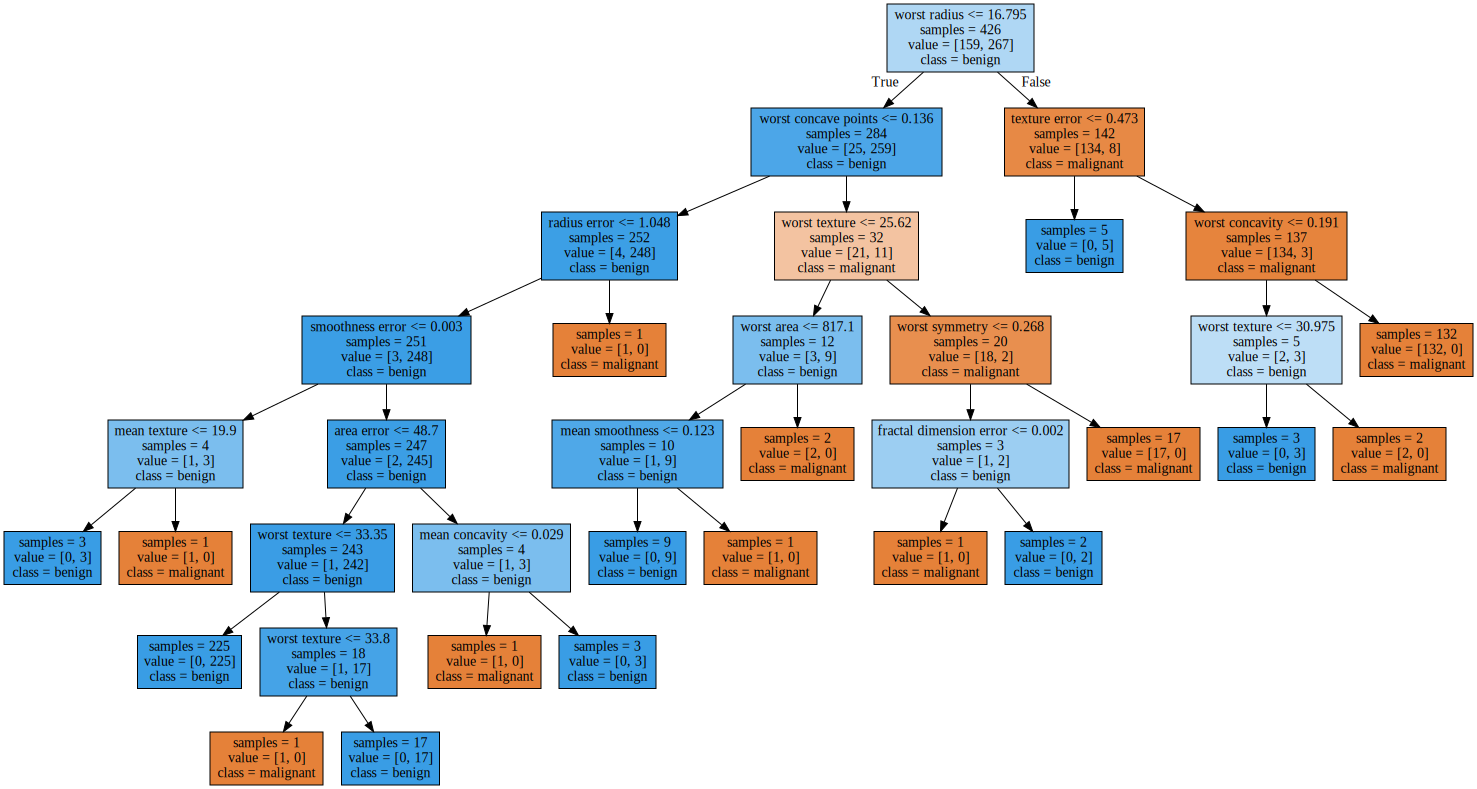

In [12]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 알고리즘의 예측이 어떻게 이루어지는지 이해하기 쉽지만 깊이가 4만 되어도 트리는 매우 커짐(트리가 더 깊어지면 한눈에 보기가 힘들어짐)
- 트리를 조사할 때는 많은 수의 테이터가 흐르는 경로를 중심으로 보면 좋음

## 트리의 feature 중요도
- 전체 트리를 살펴보는 것은 어려울 수 있으니, 대신 트리가 어떻게 작동하는지 요야하는 속성들을 사용할 수 있음
- 가장 널리 사용되는 속성은 트리를 만드는 결정에 각 feature가 얼마나 중요한지를 평가하는 특성 중요도(feature importance)임
- 이 값은 0과1 사이의 숫자로, 각 feature에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 target클래스를 예측했다는 뜻임
- 특성 주요도의전체 합은 1

In [15]:
print("Feature importances:\n", tree.feature_importances_)

Feature importances:
 [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


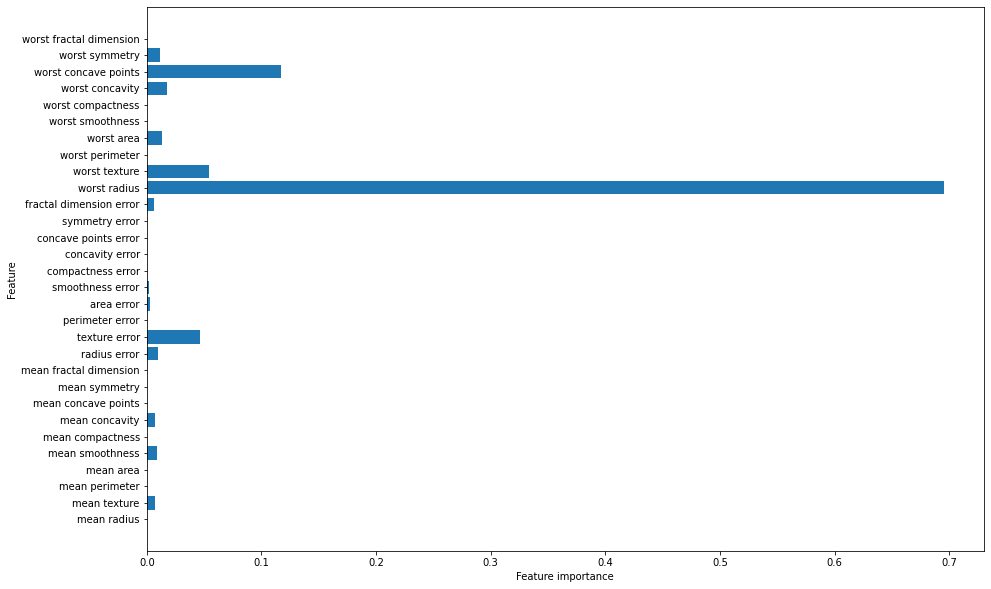

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(15, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
    
    
plot_feature_importances_cancer(tree)

- 첫번째 노드에서 사용한 feature("worst_radius")가 가장 중요한 feature로 나타남
- 이 그래프는 첫번째 노드에서 두 클래스를 꽤 잘 나누고 있다는 사실을 뒷받침
- 그러나 어떤 feature의 feature_importance 값이 낮다고 해서 이 feature가 유용하지 않다는 뜻이아님
- 단지 트리가 그 피쳐를 선택하지 않았을 뿐이며 다른 피쳐가 동일한 정보를 지니고 있어서 알 수있음
- 선형 모델의 계수와는 달리, 특성 주요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없음
- 즉 특성 중요도의 값은"worst_radius"가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지 알 수없음

In [ ]:
tree= mglearn.plots.plot_tree_not_monotone()
plt.show()
display

- x[1]에 있는 정보만 사용되었고 x[0]는 전혀 사용되지 않았음
- 그리고 x[1]과 출력 클래스와의 관계가 단순하게 비례 또는 반비례하지 않음

## 회귀 결정 트리

- Decision TreeRegressor로 구현된 회귀 결정 트리에서도 위와 비슷하게 적용됨 
- 회귀를 위한 트리 기반의 모델을 사용할 때 짚고 넘어가야 할 특별한 속성이 하나 있음
- DecisionTreeRegressor는 extrapolation 즉, 훈련 데이터 범위 밖의 포인트에 대해 예측을 할 수 없음
- 다음의 컴퓨터 메모리 가격 통합 데이터셋을 이용해 더 자세히 살펴봄
- x축은 잘자, y 축은 해당 년도의 RAM 1MB당 가격임

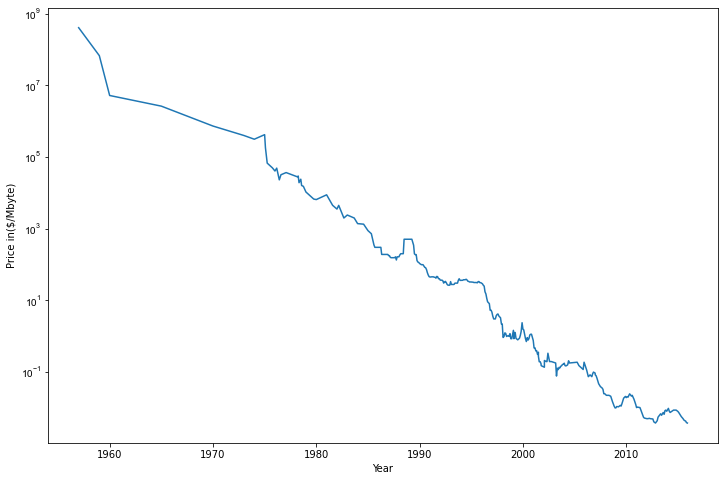

In [18]:
import pandas as pd
ram_prices = pd.read_csv('data/ram_price.csv')

plt.figure(figsize=(12,8))
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in($/Mbyte)')
plt.show()

- 날짜 feature하나 만으로 2000년 전까지의 데이터로부터 2000년 후의 가격을 예측해 보겠음
- 두 모델 DecisionTreeRegressor과 linearRegression을 비교해 보겠음

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다. np.newaxis => 차원을 늘림
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

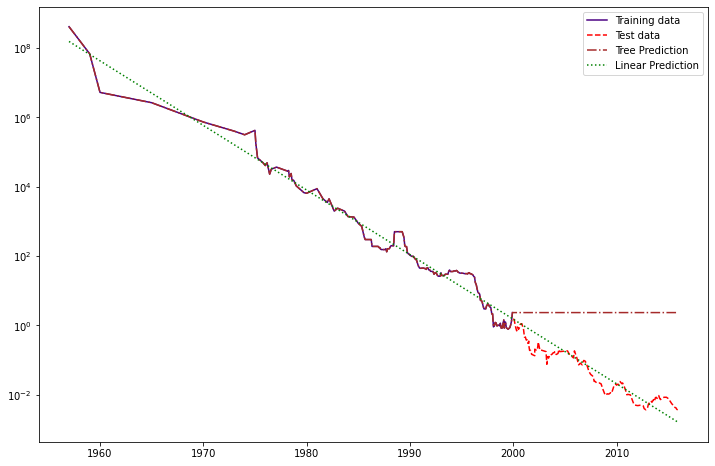

In [20]:
plt.figure(figsize=(12,8))
plt.semilogy(data_train.date, data_train.price, color='indigo', linestyle='-', label="Training data")
plt.semilogy(data_test.date, data_test.price, color='red', linestyle='--', label="Test data")
plt.semilogy(ram_prices.date, price_tree, color='brown', linestyle='-.', label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, color='green', linestyle=':', label="Linear Prediction")
plt.legend()
plt.show()

In [ ]:
- 트리 모델은 훈력 데이터 밖의 새로운 데이터를 예측할 능력이 없음, 모든 트리 기반 모델의 공통된 단점임


In [ ]:
## 장단점과 매개변수
- 결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수임
- mac_depth, max_leaf_nodes,min_samples_leaf중 하나만 지정해도 과대적합을 막는데 충분함
- 결정트리가 이저에 소개한 다른 알고리즘보다 나은 점은 두가지
- 첫 째, 만들어진 모델을 쉽게 시각화 랗 수있어서 비전문가도 이해하기 쉬움
- 데이터의 스케일에 구애받지 않음, 각 feature가 개별적으로 처리되어 데이터를 분할 하는데 데이터 스케일의 영향을 받지 않으므로결정 트리에서는 feature의 정규화나 표준화 같은 전처리 과저잉 필요없음
- 특히 feature의 스케일이 서로 다르거나 이전 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동함
- 결정 트리의 주요 단점은 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않음
- 그래서 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용함
- 앙상블은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법임